## Importing neccessary libraries

In [1]:
import pandas as pd # Importing Pandas
import numpy as np # Importing Numpy
from textblob import TextBlob 

import nltk
import string
import warnings
warnings.filterwarnings('ignore')
from nltk import tokenize,WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

from string import punctuation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [2]:
# using predefined list of stopwords given by NLTK

stopwords1 = list(stopwords.words('english'))
print(stopwords1[0:11])
print('\nlength of stopwords list: ', len(stopwords1))
type(stopwords1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]

length of stopwords list:  179


list

In [3]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
stopwords1 = list(stopwords.words('english'))+list(punctuation) # combining stopwords along wit punctiation marks

In [5]:
print(len(stopwords1),stopwords1,sep='\n\n')

211

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'tha

In [6]:
data = pd.read_csv('C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course4-NLP/Day 3 (Sujata)/csat.csv')

In [13]:
data.head()

,Rep_sat,Verbatim
0,10.0,Technician was great. Professional and had muc...
1,0.0,The agent with whom I had a word took only 15 ...
2,9.0,NaN
3,10.0,Nothing. I received the exact help that I nee...
4,10.0,NaN


In [14]:
print(data.isnull().sum(),data.shape,sep='\n\n') # checking for null values

Rep_sat         5
Verbatim    57428
dtype: int64

(150002, 2)


In [15]:
data.dropna(inplace = True) # Dropping nUll values

In [16]:
data=data.iloc[:1000] # limiting the data for demo,not to be followed in real industry  , not mandat

In [17]:
# Creating flags as per Representative score
#  0-5 - Not Satisfied
#  6-7 - Average Satisfaction
#  7-10 - Highly Satisfied Customer

In [18]:
data['Score'] = data['Rep_sat'].apply(lambda x: 'Poor' if x<=5 else 'Average' if (x>=6 and x<=7) else 'Good')

In [19]:
data.head()

,Rep_sat,Verbatim,Score
0,10.0,Technician was great. Professional and had muc...,Good
1,0.0,The agent with whom I had a word took only 15 ...,Poor
3,10.0,Nothing. I received the exact help that I nee...,Good
5,10.0,None. Faultless,Good
6,10.0,My representative was great!,Good


In [20]:
ps=PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [21]:
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# defining lemmatizer which will take POS tags into consideration before performing lemmatization
def lemmatize_sentence(sentence):    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
#     print(list(nltk_tagged))
    
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

    
    lemmatized_sentence = []       
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
#             print('IN CASE OF NONE: ', lemmatized_sentence)
        
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
#             print('IN CASE OF ELSE : ',lemmatized_sentence)

    
    return " ".join(lemmatized_sentence)

# print(lemmatize_sentence(" i have been working on my skills ")) #I be love it



In [ ]:
## language Detection and transaltion using Textblob-- limited access

# def lang_detect(i):
#     a = TextBlob(i)
#     t = a.detect_language()
#     if t != 'en':
#         return t
#     else:
#         return 'en'


# def lang_trans(i):
#     a = TextBlob(i)
#     t = a.detect_language()
#     if t != 'en':
#         return a.translate(t, 'en')
#     else:
#         return i
    

In [22]:
# Removing Stopwords and punctuatons
def clean_text(a):
    ls = [i.lower() for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1]
    # Refraning the data having less than 3 tokens
    if len(ls)>3:
        val= ' '.join(ls)
        return val
    else :
        return None
 
    
# Lemmatization by only considering Verb for the clean data
def clean_text_lemma(a):
    val= ' '.join([lemmatizer.lemmatize(i.lower(),pos = 'v') for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1])
    return val


# Stemming on clean data
def clean_text_stem(a):    
    val= ' '.join([ps.stem(i.lower()) for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1])
    return val

In [179]:
# from tqdm import tqdm
# tqdm.pandas()

In [23]:
# performing tokenization -> stopword removal -> normalization  -> allowing sentences having more than 3 tokens
data['clean_txt'] = data['Verbatim'].apply(clean_text)

# Dropping data having NONE into it (our condition was if len(ls)<3 then return none so we need to drop those none values.)
data.dropna(inplace = True)
len(data) 
# out of 1000, i got 797.

797

In [24]:
data.head()

,Rep_sat,Verbatim,Score,clean_txt
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...
1,0.0,The agent with whom I had a word took only 15 ...,Poor,agent word took 15 minutes conclude permission...
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing received exact help needed issue resol...
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,rep great adobe website n't place get needed r...
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people spoke clueless could help


In [25]:
# Lemmatization by only considering Verb for the clean data
data['clean_lemma'] = data['clean_txt'].apply(clean_text_lemma)

# Lemmatization by considering respective POS tags
data['clean_lemma_pos'] = data['clean_txt'].apply(lemmatize_sentence)

# Stemming on clean data
data['clean_stem_txt'] = data['clean_txt'].apply(clean_text_stem)

In [26]:
data.head()

,Rep_sat,Verbatim,Score,clean_txt,clean_lemma,clean_lemma_pos,clean_stem_txt
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...,technician great professional much patience no...,technician great professional much patience no...,technician great profession much patienc novic...
1,0.0,The agent with whom I had a word took only 15 ...,Poor,agent word took 15 minutes conclude permission...,agent word take 15 minutes conclude permission...,agent word take 15 minute conclude permission ...,agent word took 15 minut conclud permiss relat...
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing received exact help needed issue resol...,nothing receive exact help need issue resolve ...,nothing receive exact help need issue resolve ...,noth receiv exact help need issu resolv quickli
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,rep great adobe website n't place get needed r...,rep great adobe website n't place get need rep...,rep great adobe website n't place get need rep...,rep great adob websit n't place get need rep s...
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people spoke clueless could help,first two people speak clueless could help,first two people speak clueless could help,first two peopl spoke clueless could help


In [27]:
data['clean_lemma_pos'].iloc[19] # Lemmatized data by considering respective POS tags

'make detailed website export process adobe animate confuse unclear design straightforward product'

In [28]:
data['clean_stem_txt'].iloc[19] # Stemmed data 

'make detail websit export process adob anim confus unclear design straightforward product'

In [29]:
data['clean_lemma'].iloc[19] # Lemmatized data by considering Verb tags

'make detail website export process adobe animate confuse unclear design straightforward products'

In [30]:
data['Verbatim'].iloc[19] # Origanl customer review

'Make a more detailed website, the export process from adobe animate is very confusing and unclear. Design more straightforward products'

# Calculating Sentiment Score

## Polarity Score is float which lies in the range of [-1,1] 

**It represents Whether person is happy or sad with the service**

## Subjectivity is also a float which lies in the range of [0,1]
**Subjective sentences generally refer Whether the comment is factual info or personal**


In [31]:
# Using Textblob.Sentiment to calculate the sentiment score w.r.t to every cusotmer review
data['sentiment'] = data['clean_lemma_pos'].apply(lambda reveiw: TextBlob(reveiw).sentiment)

data.head()

,Rep_sat,Verbatim,Score,clean_txt,clean_lemma,clean_lemma_pos,clean_stem_txt,sentiment
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...,technician great professional much patience no...,technician great professional much patience no...,technician great profession much patienc novic...,"(0.3666666666666667, 0.35000000000000003)"
1,0.0,The agent with whom I had a word took only 15 ...,Poor,agent word took 15 minutes conclude permission...,agent word take 15 minutes conclude permission...,agent word take 15 minute conclude permission ...,agent word took 15 minut conclud permiss relat...,"(0.9, 1.0)"
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing received exact help needed issue resol...,nothing receive exact help need issue resolve ...,nothing receive exact help need issue resolve ...,noth receiv exact help need issu resolv quickli,"(0.29166666666666663, 0.375)"
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,rep great adobe website n't place get needed r...,rep great adobe website n't place get need rep...,rep great adobe website n't place get need rep...,rep great adob websit n't place get need rep s...,"(0.5, 0.475)"
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people spoke clueless could help,first two people speak clueless could help,first two people speak clueless could help,first two peopl spoke clueless could help,"(0.25, 0.3333333333333333)"


In [ ]:
'''
load the data -> word tokenize --- > remove stop words/punctuation  ---> lemmetize/ stemming/ normalization each document ---> call sentiment
'''

In [32]:
# Creating new column having Polarity
data['Polarity'] = data['sentiment'].apply(lambda x: round(x[0],2)) # Whether person is happy or sad with the service

# Creating new column having Subjectivity
data['Subjectivity'] = data['sentiment'].apply(lambda x: round(x[1],2)) # Whether the comment is factual info or personal

# dropping the sentiment column from the datafrarme
del data['sentiment']

In [33]:
data.head(5)

,Rep_sat,Verbatim,Score,clean_txt,clean_lemma,clean_lemma_pos,clean_stem_txt,Polarity,Subjectivity
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...,technician great professional much patience no...,technician great professional much patience no...,technician great profession much patienc novic...,0.37,0.35
1,0.0,The agent with whom I had a word took only 15 ...,Poor,agent word took 15 minutes conclude permission...,agent word take 15 minutes conclude permission...,agent word take 15 minute conclude permission ...,agent word took 15 minut conclud permiss relat...,0.90,1.00
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing received exact help needed issue resol...,nothing receive exact help need issue resolve ...,nothing receive exact help need issue resolve ...,noth receiv exact help need issu resolv quickli,0.29,0.38
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,rep great adobe website n't place get needed r...,rep great adobe website n't place get need rep...,rep great adobe website n't place get need rep...,rep great adob websit n't place get need rep s...,0.50,0.47
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people spoke clueless could help,first two people speak clueless could help,first two people speak clueless could help,first two peopl spoke clueless could help,0.25,0.33


In [34]:
# Bucketing the Polarity scores into Medium, lower and Higher buckets using Lambda expresisno
data['Polarity_buckets'] = data['Polarity'].apply(lambda x: 'lower' if x<=0.4 else 'middle' if (x>=0.5 and x<=0.65) else 'higher')
# or
# data['Polarity_buckets'] = data['Polarity'].apply(lambda x: 'lower' if x<=-0.1 else 'middle' if (x>=0.1 and x<=0.3) else 'higher')

In [35]:
data['Polarity_buckets'].value_counts()

lower     604
higher    121
middle     72
Name: Polarity_buckets, dtype: int64

In [37]:
data['Polarity_buckets'].value_counts(normalize=True)*100
# only 15% customers r happy with my services.

lower     75.784191
higher    15.181932
middle     9.033877
Name: Polarity_buckets, dtype: float64

In [39]:
data.head()

,Rep_sat,Verbatim,Score,clean_txt,clean_lemma,clean_lemma_pos,clean_stem_txt,Polarity,Subjectivity,Polarity_buckets
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...,technician great professional much patience no...,technician great professional much patience no...,technician great profession much patienc novic...,0.37,0.35,lower
1,0.0,The agent with whom I had a word took only 15 ...,Poor,agent word took 15 minutes conclude permission...,agent word take 15 minutes conclude permission...,agent word take 15 minute conclude permission ...,agent word took 15 minut conclud permiss relat...,0.90,1.00,higher
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing received exact help needed issue resol...,nothing receive exact help need issue resolve ...,nothing receive exact help need issue resolve ...,noth receiv exact help need issu resolv quickli,0.29,0.38,lower
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,rep great adobe website n't place get needed r...,rep great adobe website n't place get need rep...,rep great adobe website n't place get need rep...,rep great adob websit n't place get need rep s...,0.50,0.47,middle
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people spoke clueless could help,first two people speak clueless could help,first two people speak clueless could help,first two peopl spoke clueless could help,0.25,0.33,lower


<AxesSubplot:xlabel='Rep_sat', ylabel='Density'>

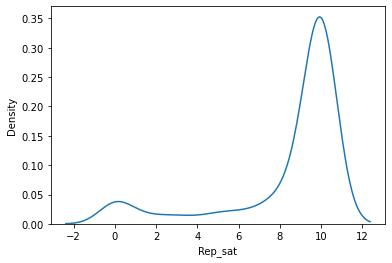

In [40]:
# Visualising the Representative score using distribution plot
sns.distplot(data['Rep_sat'],hist = False)
# Something is wrong with my model coz representative score is good,it's between 8 to 10 which is good.
# But above, my model is showing in polarity score only 15% r happy
# use below bucket n try again
#  data['Polarity_buckets'] = data['Polarity'].apply(lambda x: 'lower' if x<=-0.1 else 'middle' if (x>=0.1 and x<=0.3) else 'higher')

<AxesSubplot:xlabel='Score', ylabel='count'>

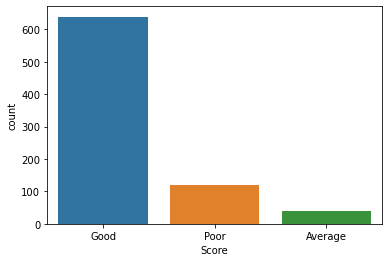

In [41]:
# Visualising the score using count plot
sns.countplot(data['Score'])

<AxesSubplot:xlabel='Polarity', ylabel='Density'>

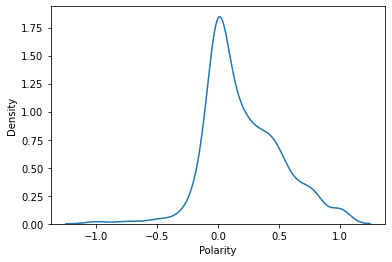

In [42]:
# Visualising the Polarity score using distribution plot
sns.distplot(data['Polarity'],hist = False)
# As per polarity representation most of my customers r neutral and happy. I will have to make changes in bucket of my model.

In [43]:
# Creating Training and Testng Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['clean_lemma_pos'],# this is input feature.will convert into 0s n 1s using TF-IDF technique.
                                                    data['Score'], # y/target
                                                    test_size = 0.2,
                                                    random_state = 37)
len(x_train)

637

In [ ]:
# 1)  Count vectorizer - give only count --> tfidf transformer ---> tf *idf

# 2)  TfidfVectorizer - tf , idf


In [44]:
tf_idf = TfidfVectorizer() # try with tf_idf = TfidfVectorizer(min_df=0.2) 

In [45]:
# Transforming the X_train to transfrmed tfidf sparse matrix --> BOW
tf_idf.fit_transform(x_train) # output is sparse mattix
# 2920 is number of features. From 637 senetnces how many no. of words generated? ans is 2920.

<637x2920 sparse matrix of type '<class 'numpy.float64'>'
	with 11246 stored elements in Compressed Sparse Row format>

In [46]:
# Converting Sparse matrics into array representaion form
tf_idf_x_train = tf_idf.fit_transform(x_train).toarray() # to have sparse matric converted in form of array
tf_idf_x_test = tf_idf.transform(x_test).toarray()

In [47]:
display( tf_idf_x_train, tf_idf_x_train.shape)
# each and every sentence has 2920 featurs/words
# this is my bow generated by tf-idf vectorizer

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(637, 2920)

In [48]:
max(tf_idf_x_train[0])

0.4674925171440115

In [49]:
np.argmax(tf_idf_x_train[0]) # gives index where we have maximum value.

905

In [51]:
tf_idf_x_train[0,901:907] # 0.46749252 this is my max score in document 0

array([0.        , 0.        , 0.        , 0.        , 0.46749252,
       0.        ])

In [52]:
# lenght of tfidf vocalbulary/ features
len(tf_idf.vocabulary_)

2920

In [53]:
# tfidf vocalbulary/ features
tf_idf.vocabulary_

{'would': 2706,
 'good': 1080,
 'knowledgeable': 1340,
 'technical': 2368,
 'support': 2326,
 'expert': 905,
 'know': 1336,
 'talk': 2350,
 'suporte': 2325,
 'como': 482,
 'adobe': 110,
 'melhor': 1488,
 'sugestão': 2315,
 'eu': 868,
 'centralizaria': 418,
 'mais': 1455,
 'páginas': 1913,
 'de': 622,
 'cada': 374,
 'software': 2224,
 'vezes': 2601,
 'somos': 2237,
 'direcionados': 691,
 'para': 1706,
 'link': 1404,
 'tutorial': 2496,
 'existe': 897,
 'central': 417,
 'treinamentos': 2477,
 'um': 2508,
 'pouco': 1821,
 'confuso': 520,
 'também': 2353,
 'uma': 2509,
 'página': 1912,
 'explicativa': 911,
 'da': 601,
 'novas': 1624,
 'soluções': 2227,
 'market': 1471,
 'ai': 137,
 'criação': 582,
 'quot': 1935,
 'university': 2533,
 'seria': 2151,
 'excelente': 884,
 'poi': 1802,
 'poderíamos': 1801,
 'aprender': 210,
 'começo': 471,
 'ao': 195,
 'fim': 967,
 'utilizar': 2576,
 'todo': 2440,
 'potencial': 1819,
 'do': 726,
 'produtos': 1871,
 'receber': 1971,
 'certificações': 424,
 'edx':

In [118]:
# tf_idf.get_feature_names()

In [54]:
for key, value in tf_idf.vocabulary_.items():
    if value == 2067:
        print(key)

rien


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [56]:
rf_clf = RandomForestClassifier()

rf_clf.fit(tf_idf_x_train,y_train)

rf_pred = rf_clf.predict(tf_idf_x_test)

print('Random Forest Accuracy Score:  ',np.round(accuracy_score(y_test,rf_pred)*100,0))


Random Forest Accuracy Score:   80.0


In [ ]:
# machine learning model deployment using PICKLE

# import pickle
# model_save=open('model_pickle.pkl','wb')
# pickle.dump(rf_clf,model_save)
# model_save.close()

# Creating Wordcloud

In [57]:
# Importing libraries for creating wordcloud

from wordcloud import WordCloud, STOPWORDS
from PIL import Image # The pillow library is a package that enables image reading
import urllib # This is used for opening URLs
import requests # Allows to Send requests



In [58]:
# Creating Data with their respective Part of Speechs
sentence = ' '.join(data.clean_lemma_pos[0:500].values)

blob = TextBlob(sentence)

tg = blob.tags

print(sentence,tg,sep='\n\n')

technician great professional much patience novice make feel value agent word take 15 minute conclude permission relate issue repeatedly tell log admin ideally “ talla “ ’ work time nothing receive exact help need issue resolve quickly rep great adobe website n't place get need rep show go account thanks first two people speak clueless could help happy adobe customer care 24/7 sure help deadline tech service excellent remain issue sync 2020 version 'll address later resolve thank go step fix problem site n't fix problem spend hour try chat someone could n't get screenshare software work frustration give next day reach new tech adobe try different software screenshare time work n't know would one way seem create confusion 2 hour work tech could n't resolve issue uploaded log file adobe could research 4 day later reach adobe see clue creative cloud syncing could n't ui work answer instead want another screenshare n't want waste time thing way already follow step tech felt like one listen

In [59]:
# Filtering Data , where specific tags like Names, Numbers etc. are not rrequired in wordcloud
t1 = []
for ind,val in enumerate(tg):
    if tg[ind][1] != 'CD' and tg[ind][1] != 'FW' and tg[ind][1] != 'NNP' and tg[ind][1] != 'PRP' and tg[ind][1] != 'DT':
        t1.append(tg[ind][0])
#         print(val)
t1 = ' '.join(t1)
t1

"technician great professional much patience novice make feel value agent word take minute conclude permission relate issue repeatedly tell log admin ideally talla work time nothing receive exact help need issue resolve quickly rep great adobe website n't place get need rep show go account thanks first people speak clueless could help happy adobe customer care sure help deadline tech service excellent remain issue sync version 'll address later resolve thank go step fix problem site n't fix problem spend hour try chat someone could n't get screenshare software work frustration give next day reach new tech adobe try different software screenshare time work n't know would way seem create confusion hour work tech could n't resolve issue uploaded log file adobe could research day later reach adobe see clue creative cloud syncing could n't ui work answer instead want screenshare n't want waste time thing way already follow step tech felt like listen end work felt issue catalina compatibilit

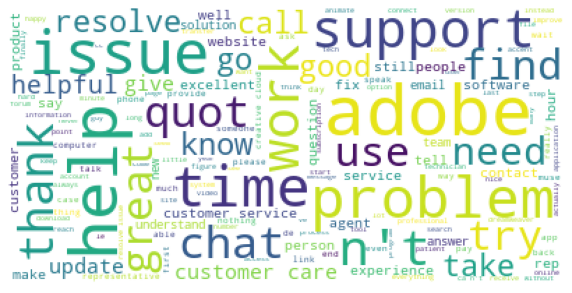

In [60]:
#Simple Word CLoud

wordcloud = WordCloud(max_font_size=50, 
                      max_words=150, 
                      background_color="white",
#                       color_func=lambda *args, **kwargs:(150,100,100),
                      stopwords= STOPWORDS).generate(t1)

plt.figure(figsize=(10,8))

plt.imshow(wordcloud) # Command to show the image
plt.axis("off") # to Turnoff the axis
plt.show()

In [ ]:
# clean data
# lemmatization and other techniques
# sentiment score
# classification model / Regression Model

In [61]:
# Example to validate the words appearing in the wordcloud
blob.word_counts['problem']

134

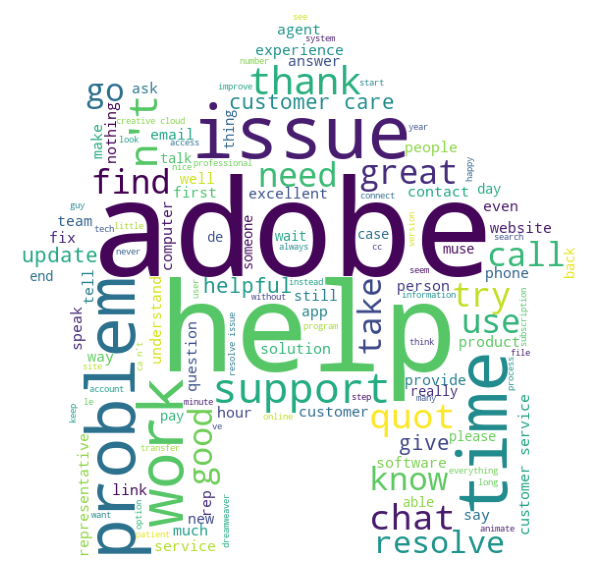

In [62]:
# Mask will change the wordcloud into any shape of your choice
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))
# mask = np.array(Image.open(requests.get('https://ak.picdn.net/shutterstock/videos/208984/thumb/1.jpg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, 
                           height = 512, 
                           background_color='white', 
                           stopwords=STOPWORDS, 
                           max_words = 130,
                           mask=mask).generate(words)
    
    plt.figure(figsize=(10,8),facecolor = 'white')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    

generate_wordcloud(t1, mask)